# Supervised Learning - Foundations Project: ReCell 

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
uceld = pd.read_csv("used_device_data.csv")
# Create a copy
df = uceld.copy()

# to see the entire dataframe when print it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [3]:
# Examine data shape
print(f"There are {uceld.shape[0]} rows and {uceld.shape[1]} columns.")

There are 3454 rows and 15 columns.


<IPython.core.display.Javascript object>

In [4]:
# looking at 18 random rows
# setting the random seed via np.random.seed so that
# to get the same random results every time
np.random.seed(1)
uceld.sample(n=18)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,4.038832,5.190788
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,2.800325,3.884652
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,4.370713,4.487287
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,4.677863,5.639422
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,4.517650,5.300415
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,4.645640,5.634325
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,3.764451,4.244344
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,4.422809,5.799820
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,4.959412,6.040659
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,4.227855,4.879007


<IPython.core.display.Javascript object>

In [5]:
# check number of rows and columns
uceld.shape

(3454, 15)

<IPython.core.display.Javascript object>

The dataset has 3454 rows and 15 columns.

In [6]:
# checking column datatypes and number of non-null values
uceld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

- brand_name, os, 4g and 5g are categorical while all others are numerical data types
- used_price is the dependant variable

In [7]:
# checking for missing values in the data.
uceld.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

- main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight have missing values, these can be fixed

In [8]:
uceld.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

- There are 34 different manufacturing brands, 4 different operating systems, 4gs or 5gs have either values yes or no for different phones
- Anroid is the most popular os, with 3214 phones running on the same
- 2335 phones have 4g available and only 1119 phones have 5g available
- The average values for most numerical data types like screen_size, main_camera_mp, selfie_camera_mp, int_memory, battery, weight are larger than median values, indicating that data may be skewed right
- The average values and median values are almost similar for amount of RAM in GB, indicating very little skwewness, if any
- The average values for number of days the used/ refurbished phone has been used is less than median value
- The earliest available phone is 2 yr old(2020) and maximum 8 yr old.
- The newest available used phone is 91 days old and the maximum is 3yrs old.

In [9]:
uceld.describe(include="object")

,brand_name,os,4g,5g
count,3454,3454,3454,3454
unique,34,4,2,2
top,Others,Android,yes,no
freq,502,3214,2335,3302


<IPython.core.display.Javascript object>

- There are 34 unique brands with 4 unique OS out of those majority are android.
- Most of the devices nearly 2335 are supported with 4g.

In [10]:
df = uceld.copy()

<IPython.core.display.Javascript object>

In [11]:
count = df["selfie_camera_mp"].value_counts()[0]
print("Count of zeros in Column   : ", count)

Count of zeros in Column   :  39


<IPython.core.display.Javascript object>

In [12]:
selfie_camera_mp_col = df["selfie_camera_mp"]
selfie_camera_mp_col.replace(
    to_replace=0, value=selfie_camera_mp_col.mean(), inplace=True
)

<IPython.core.display.Javascript object>

In [13]:
# Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    print("Count of zeros in column ", column_name, " is : ", count)

Count of zeros in column  brand_name  is :  0
Count of zeros in column  os  is :  0
Count of zeros in column  screen_size  is :  0
Count of zeros in column  4g  is :  0
Count of zeros in column  5g  is :  0
Count of zeros in column  main_camera_mp  is :  0
Count of zeros in column  selfie_camera_mp  is :  0
Count of zeros in column  int_memory  is :  0
Count of zeros in column  ram  is :  0
Count of zeros in column  battery  is :  0
Count of zeros in column  weight  is :  0
Count of zeros in column  release_year  is :  0
Count of zeros in column  days_used  is :  0
Count of zeros in column  normalized_used_price  is :  0
Count of zeros in column  normalized_new_price  is :  0


<IPython.core.display.Javascript object>

In [14]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.628278,6.935065,0.3,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

#### Unique values for categorical variables

In [15]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column.upper(), ": ", df[column].nunique())
        print(df[column].value_counts())
        print(" \n")
        print("*" * 50)
        print("\n")

BRAND_NAME :  34
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64
 

**************************************************


OS :  4
Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64
 

**************************************************


4G :  2
yes    2335
no     1119
Name: 4g, dtype: int64
 

**************************************************


5G :  2
no     3302
ye

<IPython.core.display.Javascript object>

- There are 34 different brands of phones out of them Samsung and Huawei 
  brands are the most available phones 
    
- There are 4 unique OS out of which Andoid is mostly used OS

In [16]:
df["brand_name"].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

<IPython.core.display.Javascript object>

In [17]:
df.nunique()

brand_name                 34
os                          4
screen_size               142
4g                          2
5g                          2
main_camera_mp             41
selfie_camera_mp           37
int_memory                 15
ram                        12
battery                   324
weight                    555
release_year                8
days_used                 924
normalized_used_price    3094
normalized_new_price     2988
dtype: int64

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Univariate Analysis

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

**`normalized_used_price`**

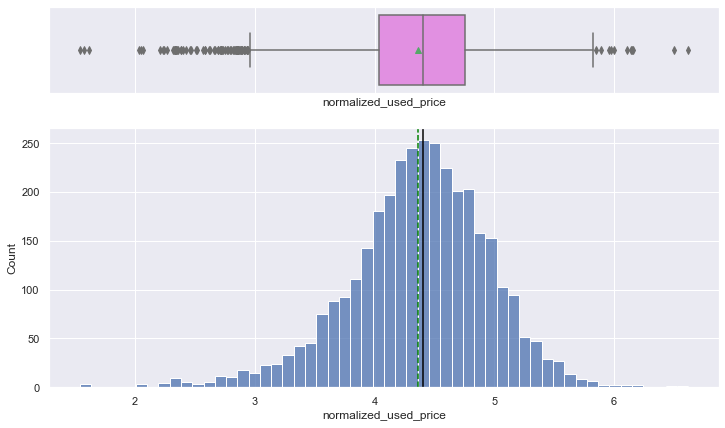

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "normalized_used_price")

**`normalized_new_price`**

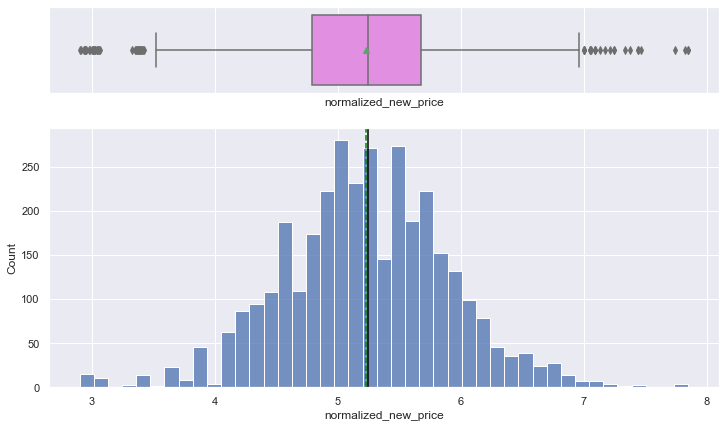

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "normalized_new_price")

**`screen_size`**

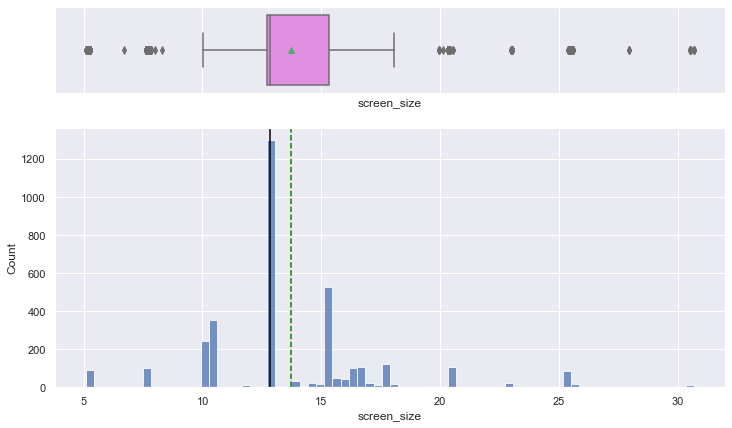

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "screen_size")

**`main_camera_mp`**

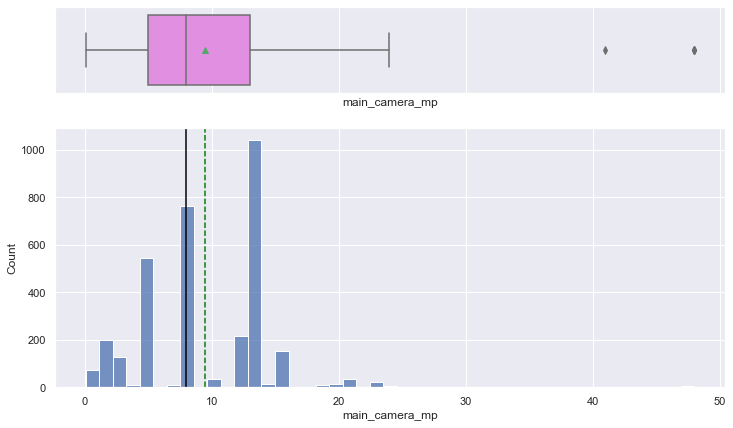

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "main_camera_mp")

**`selfie_camera_mp`**

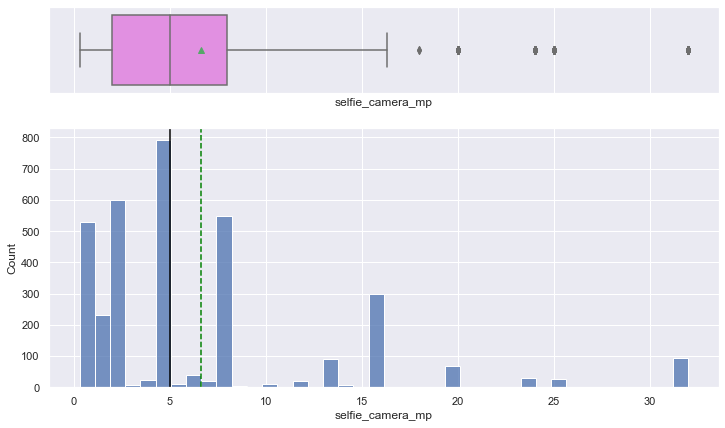

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, "selfie_camera_mp")

**`int_memory`**

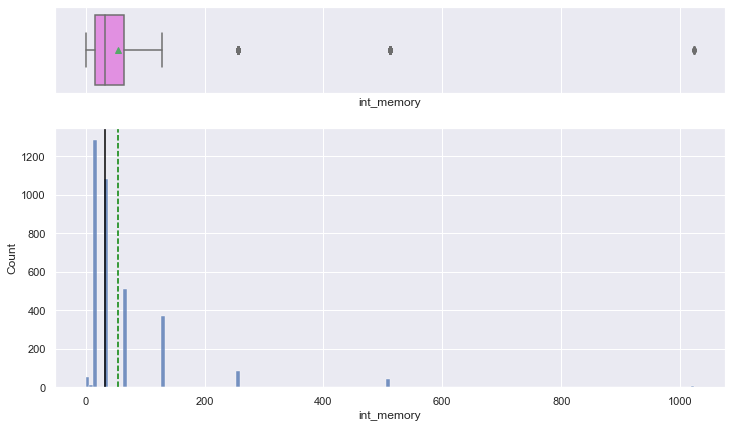

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df, "int_memory")

**`ram`**

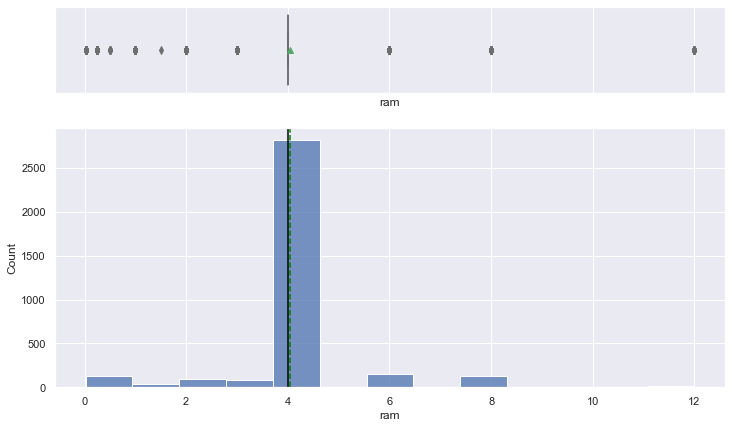

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(df, "ram")

**`weight`**

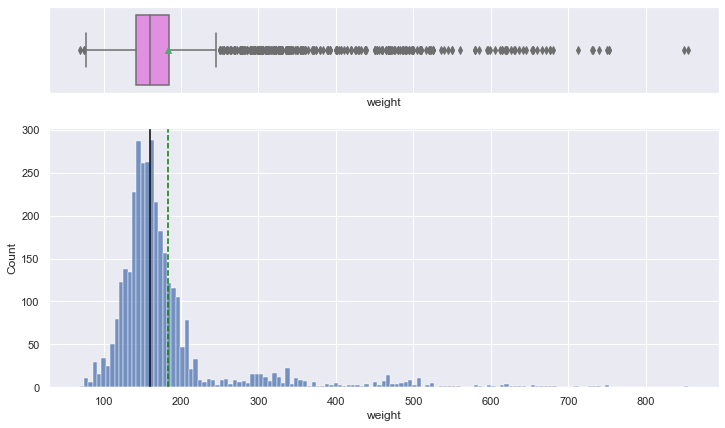

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, "weight")

In [28]:
# let's apply the log transform to see if we can make the distribution of weight closer to normal
df["weight_log"] = np.log(df["weight"])

<IPython.core.display.Javascript object>

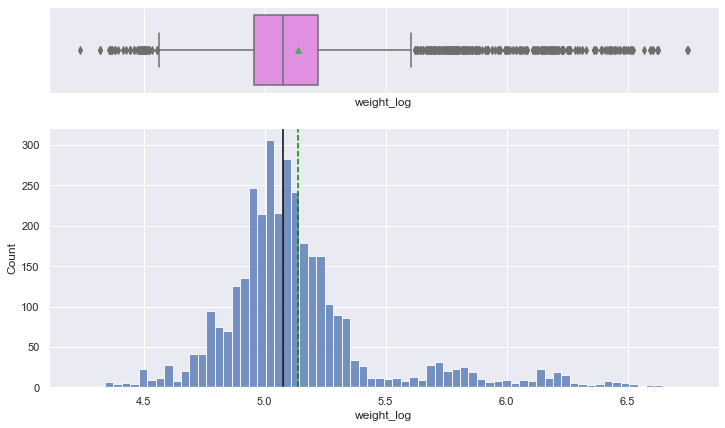

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(df, "weight_log")

**`battery`**

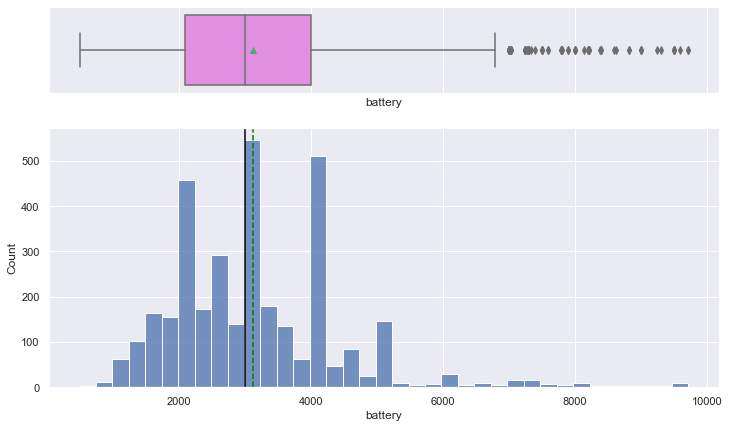

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "battery")

**`days_used`**

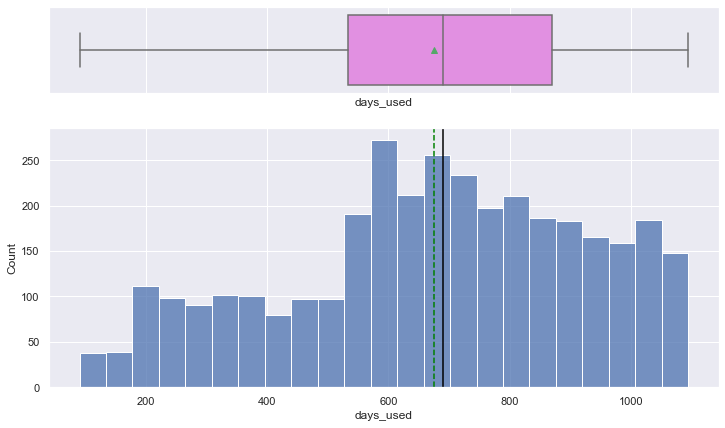

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df, "days_used")

**`brand_name`**

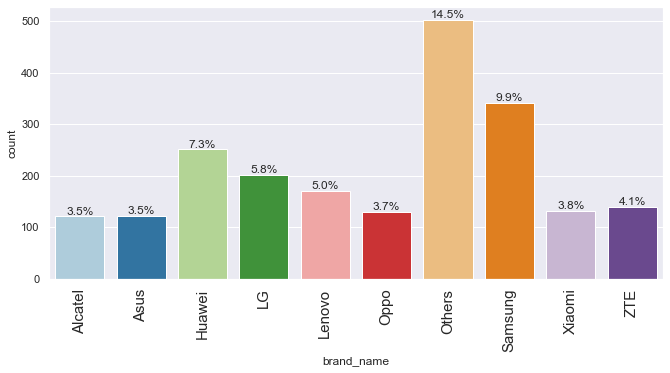

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df, "brand_name", perc=True, n=10)

**`os`**

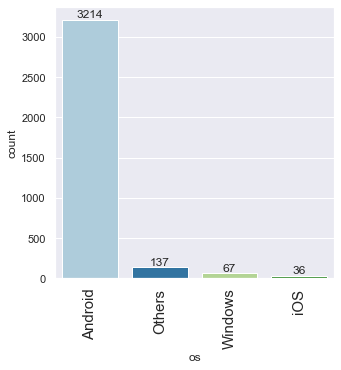

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(df, "os")

**`4g`**

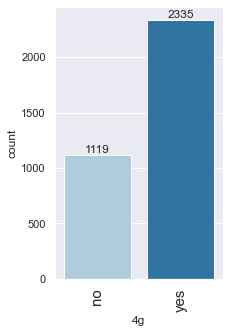

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, "4g")

**`5g`**

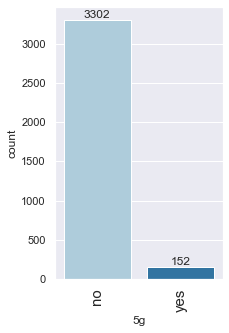

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(df, "5g")

**`release_year`**

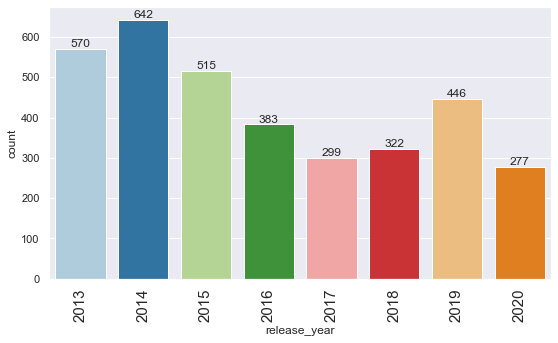

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(df, "release_year")

### Data Visualization

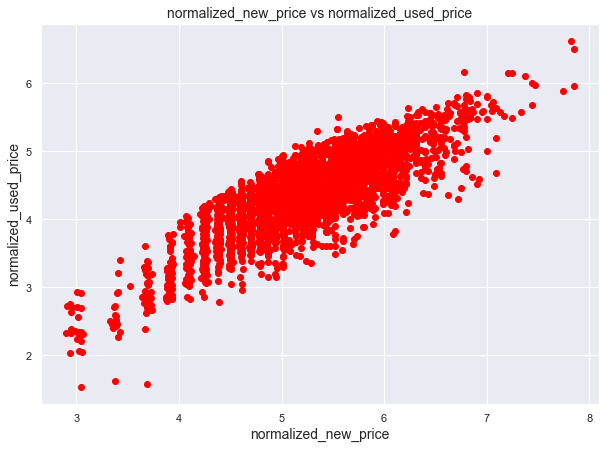

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(10, 7))
plt.scatter(df["normalized_new_price"], df["normalized_used_price"], color="red")
plt.title("normalized_new_price vs normalized_used_price", fontsize=14)
plt.xlabel("normalized_new_price", fontsize=14)
plt.ylabel("normalized_used_price", fontsize=14)
plt.grid(True)
plt.show()

- The above plot shows that the new phone price is increasing 
  as the price of the used phone is increasing.
- This shows that there is a linear relation ship between the used and new phone prices.

#### Visualization of other variables vs Target variable to understand the data:

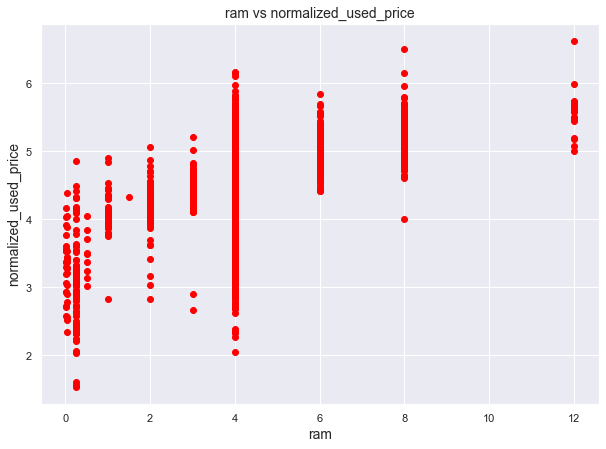

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(10, 7))
plt.scatter(df["ram"], df["normalized_used_price"], color="red")
plt.title("ram vs normalized_used_price", fontsize=14)
plt.xlabel("ram", fontsize=14)
plt.ylabel("normalized_used_price", fontsize=14)
plt.grid(True)
plt.show()

- The above plot shows that if the phone has 4-8 GB ram the dependent variable normalized_used_price
  is more compared to the other RAM values.

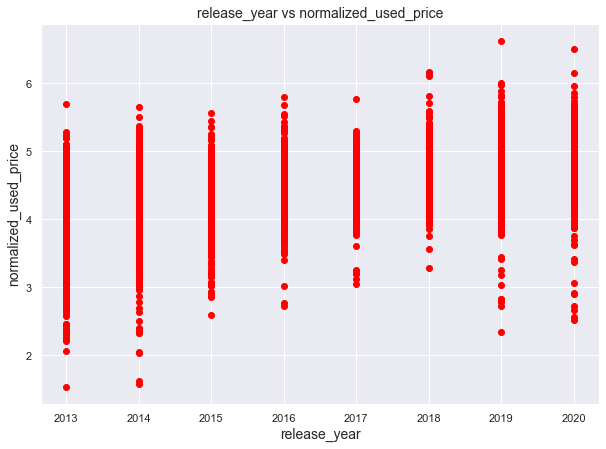

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(df["release_year"], df["normalized_used_price"], color="red")
plt.title("release_year vs normalized_used_price", fontsize=14)
plt.xlabel("release_year", fontsize=14)
plt.ylabel("normalized_used_price", fontsize=14)
plt.grid(True)
plt.show()

- The plot clearly shows that the most recent phones are selling for a higher price than the 
  phones which are released in the past years.

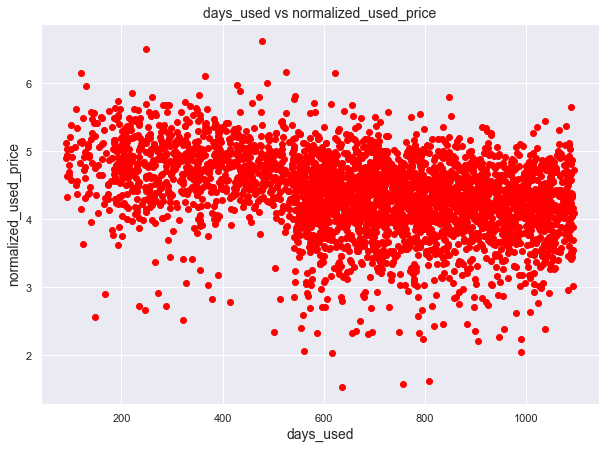

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(10, 7))
plt.scatter(df["days_used"], df["normalized_used_price"], color="red")
plt.title("days_used vs normalized_used_price", fontsize=14)
plt.xlabel("days_used", fontsize=14)
plt.ylabel("normalized_used_price", fontsize=14)
plt.grid(True)
plt.show()

- There is no relation ship between these two variables, it shows that days_used is not 
   an important feature to consider for the dependent variable (normalized_used_price) of the cell

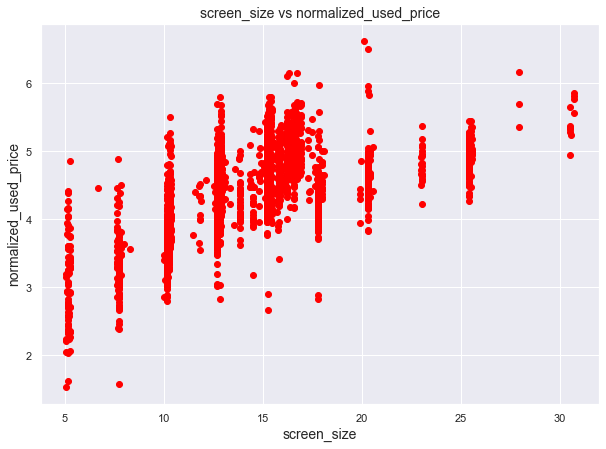

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(10, 7))
plt.scatter(df["screen_size"], df["normalized_used_price"], color="red")
plt.title("screen_size vs normalized_used_price", fontsize=14)
plt.xlabel("screen_size", fontsize=14)
plt.ylabel("normalized_used_price", fontsize=14)
plt.grid(True)
plt.show()

- There is a positive relation ship between screen_size and 
  the dependent variable (normalized_used_price), it shows that as the screen_size increases the 
  price of the cell is also increasing/

### Average price of all brands of cell phones

<AxesSubplot:xlabel='normalized_used_price', ylabel='brand_name'>

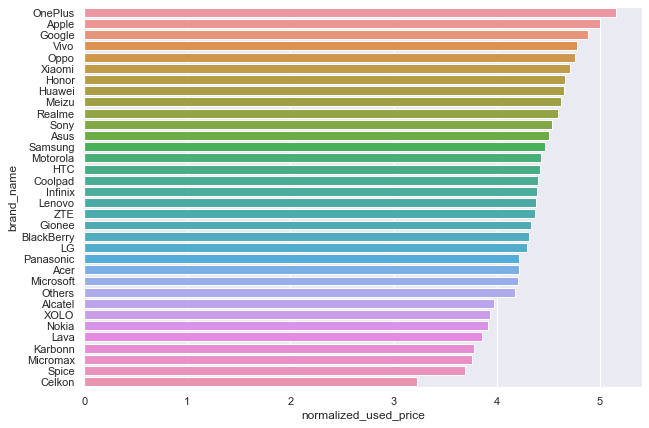

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(10, 7))
sns.barplot(
    y=df["brand_name"],
    x=df["normalized_used_price"],
    ci=False,
    order=df.groupby("brand_name")
    .mean()["normalized_used_price"]
    .sort_values(ascending=False)
    .index,
)

- The plot shows that the average used price is high for one plus brand next is apple, google.

<AxesSubplot:xlabel='normalized_used_price', ylabel='os'>

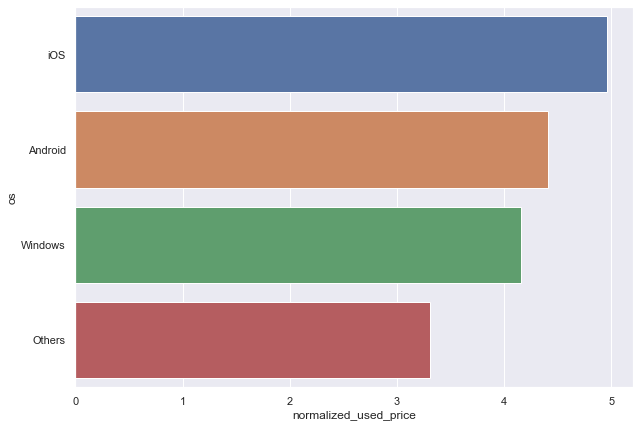

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(10, 7))
sns.barplot(
    y=df["os"],
    x=df["normalized_used_price"],
    ci=False,
    order=df.groupby("os")
    .mean()["normalized_used_price"]
    .sort_values(ascending=False)
    .index,
)

- The plot shows that the average price of ios is very high compared to windows and other os.

<AxesSubplot:xlabel='brand_name'>

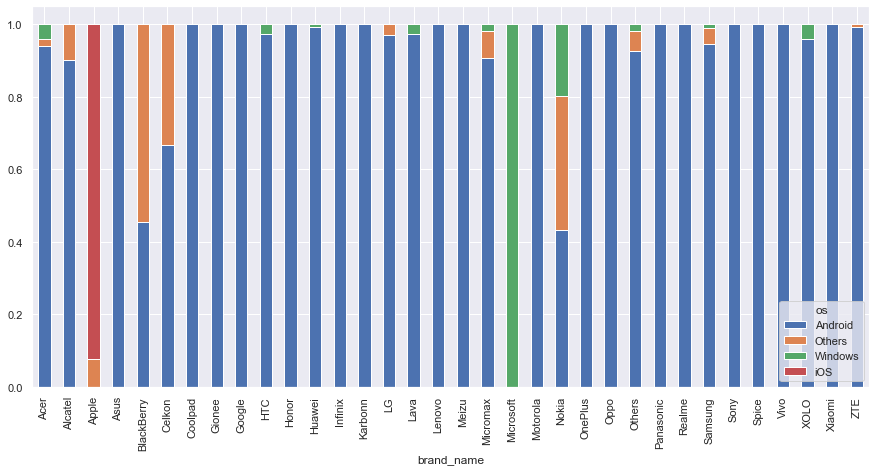

<IPython.core.display.Javascript object>

In [44]:
pd.crosstab(df["brand_name"], df["os"], normalize="index").plot(
    kind="bar", stacked=True, figsize=(15, 7)
)

-The plot shows that the most of the cell brands use Android OS compared to ios.

<function matplotlib.pyplot.show(close=None, block=None)>

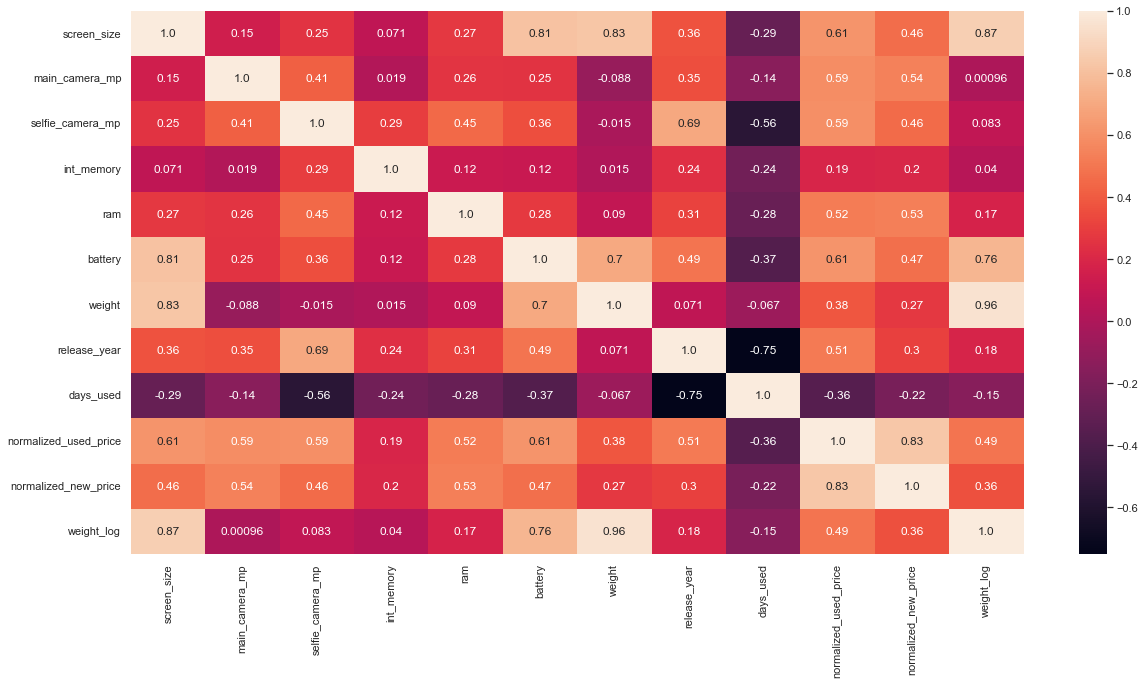

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, fmt='.2')
plt.show


- normalized_used_price and normalized_new_price are negatively correlated with days_used (-0.36 and -0.22 respectively)
- normalized_used_price and normalized_new_price are strongly-positively correlated with
  normalized_new_price and normalized_used_price respectively (0.83 in both instances)
- normalized_used_price and normalized_new_price are moderately-positively correlated with selfie_camera_mp (0.61 and 0.48),
  main_camera_mp (0.59 and 0.54), screen_size (0.61 and 0.46), battery (0.61 and 0.47);

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

###  1. What does the distribution of normalized used device prices look like?

###  Distribution of used and new phone prices

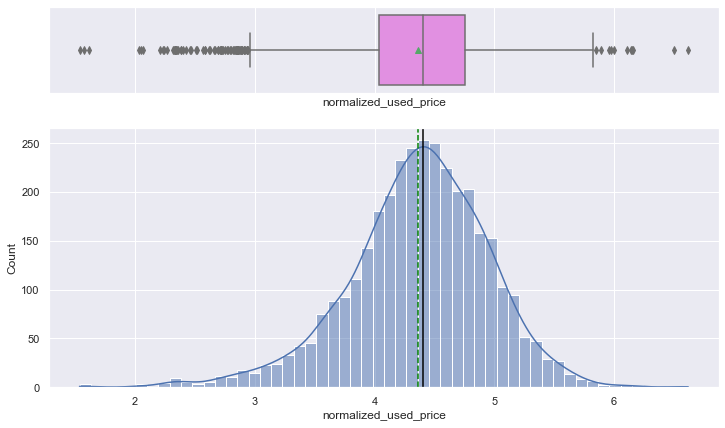

<IPython.core.display.Javascript object>

In [46]:
histogram_boxplot(df, "normalized_used_price", kde=True)

- The mean normalized_used_price is approx. €4.36 while the median normalized_used_price approx. €4,40. 
- The data seems to be normally distributed.

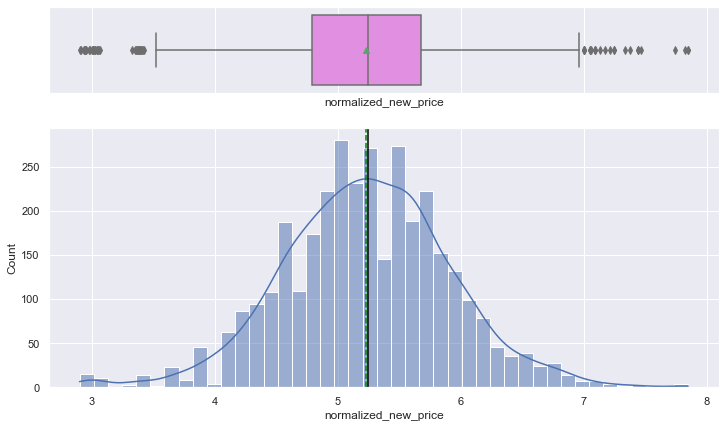

<IPython.core.display.Javascript object>

In [47]:
histogram_boxplot(df, "normalized_new_price", kde=True)

- The mean normalized_new_price is approx. €5.23 while the median normalized_new_price approx. €5.24. 
- The data seems to be normally distributed.

### 2. What percentage of the used device market is dominated by Android devices?

###  Distribution of operating systems

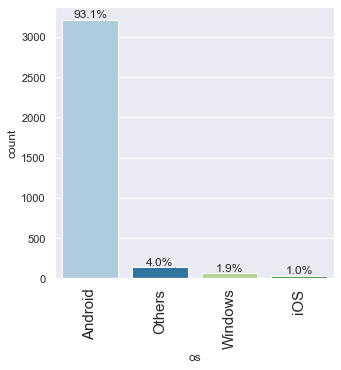

<IPython.core.display.Javascript object>

In [48]:
labeled_barplot(df, "os", perc=True)

- More than 93% of the used phone market is dominated by andorid devices

In [49]:
# since android is clearly dominating the os market, we can group others, windows and iOS together
# as a category- "not_Android"

df.loc[df.os == "Others", "os"] = "not_Android"
df.loc[df.os == "Windows", "os"] = "not_Android"
df.loc[df.os == "iOS", "os"] = "not_Android"

<IPython.core.display.Javascript object>

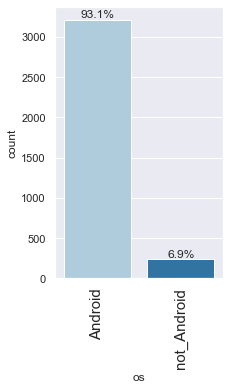

<IPython.core.display.Javascript object>

In [50]:
labeled_barplot(df, "os", perc=True)

### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
###  Distribution of RAM offered by different manufacturing brands

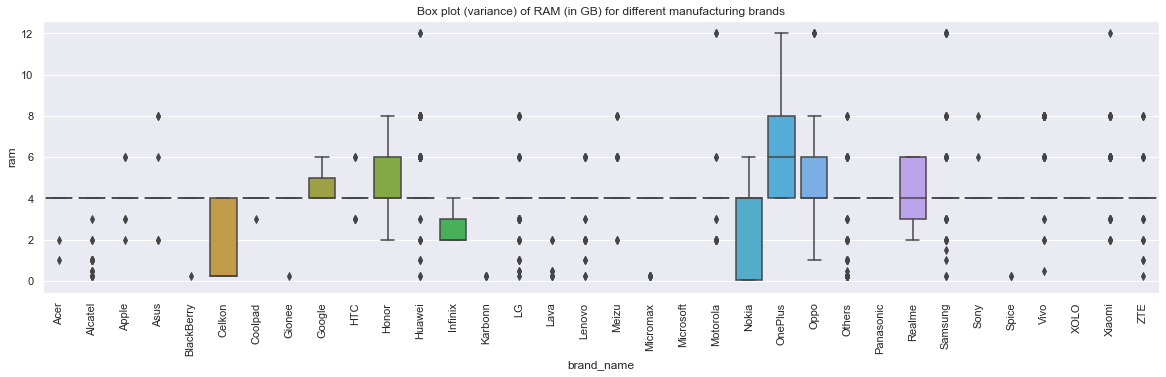

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(20, 5))

sns.boxplot(data=df.sort_values("brand_name", ascending=True), x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.title("Box plot (variance) of RAM (in GB) for different manufacturing brands")
plt.show()

- The minimun, 25%, 50%, 75% and maximum RAM (in GB) for several manufacturing brands are the same i.e. 4GB indicating little variance (spread), or absence of a defined "box"plot. However, there are still outliers present (very high or very low RAM (in GB))

### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
###  Relation between a phone's weight and battery for phone offering large batteries (more than 4500 mAh)

In [52]:
df_largebatteries = df[df["battery"] > 4500]
print(df_largebatteries.shape)

(341, 16)


<IPython.core.display.Javascript object>

- There are 341 refurbished phones with large batteries (i.e. >4500 mAh)

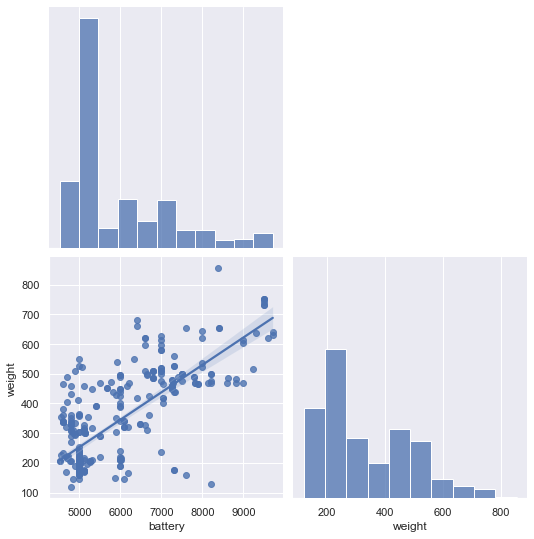

Linear correlation factor between phone's weight and battery 0.76


<IPython.core.display.Javascript object>

In [53]:
g = sns.pairplot(data=df_largebatteries[["battery", "weight"]], corner=True, kind="reg")
g.fig.set_size_inches(8, 8)
plt.show()
print(
    "Linear correlation factor between phone's weight and battery",
    round(df_largebatteries.corr()["weight"]["battery"], 2),
)

- We see a moderate correlation (0.7) between a phone's weight and battery drawing the conclusion that as the battery size increases, so does the weight

### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

###  Distribution of phones with large screen size (>6 inches) offered by different manufacturing brands

In [54]:
# 6 inches = 6*2.54cm = 15.24cm
df_largescreen = df[df["screen_size"] > 15.24]
print(df_largescreen.shape)

(1099, 16)


<IPython.core.display.Javascript object>

- There are 1099 refurbished phones with large screen size (i.e. >6 inches)

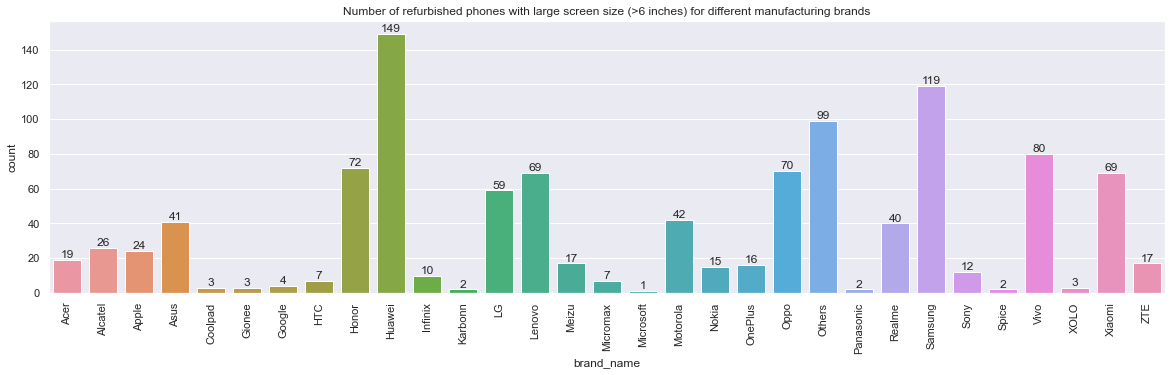

<IPython.core.display.Javascript object>

In [55]:
plt.figure(figsize=(20, 5))

ax = sns.countplot(
    data=df_largescreen.sort_values("brand_name", ascending=True), x="brand_name"
)
plt.xticks(rotation=90)
plt.title(
    "Number of refurbished phones with large screen size (>6 inches) for different manufacturing brands"
)
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=12,
        xytext=(0, 5),
        textcoords="offset points",
    )
plt.show()

- Huawei has the highest number of refurbished phones with large screen (i.e. 149 phones), followed by Samsung (119 phones), others (99 phones), Vivo (80 phones),  Oppo (70 phones) and Xiaomi (69 phones)  among known manufacturing brands
Microsoft (1 phone), Karbonn/Panasonic/Spice (2 phones) have the lowest number of refurbished phones with large screen size

### 6.A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

### Distributions of phones with great selfie camera (>8MP) offered by different manufacturing brands

In [56]:
df_greatselfiecamera = df[df["selfie_camera_mp"] > 8]
print(df_greatselfiecamera.shape)

(655, 16)


<IPython.core.display.Javascript object>

- There are 655 refurbished phones with great selfie cameras (i.e. > 8MP)

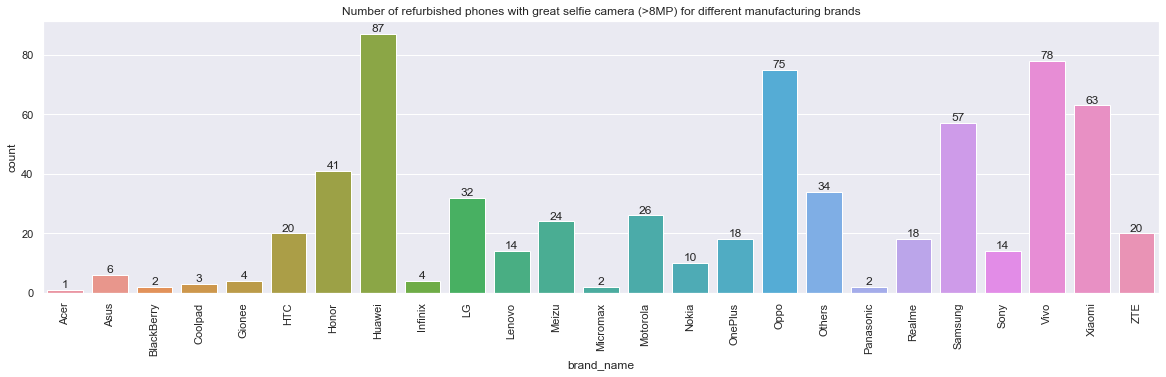

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(20, 5))

ax = sns.countplot(
    data=df_greatselfiecamera.sort_values("brand_name", ascending=True), x="brand_name"
)
plt.xticks(rotation=90)
plt.title(
    "Number of refurbished phones with great selfie camera (>8MP) for different manufacturing brands"
)
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=12,
        xytext=(0, 5),
        textcoords="offset points",
    )
plt.show()

- Huawei (87 phones), Oppo (75 phones), Vivo (78 phones), Xiaomi (63 phones) and Samsung (57 phones) have some of the highest number of refurbished phones with a great selfie camera (>8MP) - similar brand names observed as for phones with large screen size
Acer (1 phone), Blackberry/Microsoft/Panasonic (2 phones) have some of the lowest number of refurbished phones with a great selfie camera (>8MP)

### 7. Which attributes are highly correlated with the normalized price of a used device?

### Linear correlation between numerical attributes and used phone price

<AxesSubplot:>

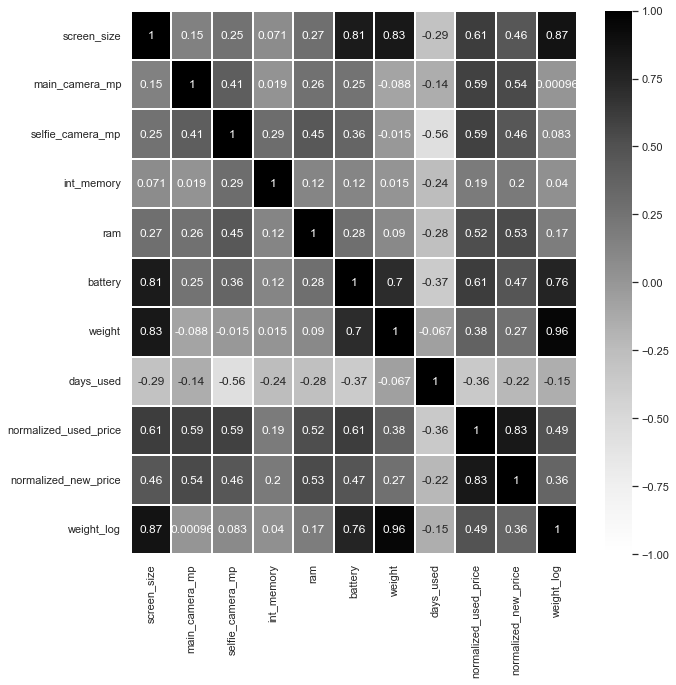

<IPython.core.display.Javascript object>

In [58]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
numeric_columns.remove("release_year")  # as it is a temporal variable

plt.figure(figsize=(10, 10))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    cmap="Greys",
    linewidths=0.05,
)

- normalized_used_price and normalized_new_price are negatively correlated with days_used (-0.36 and -0.22 respectively)
- normalized_used_price and normalized_new_price are strongly-positively correlated with
  normalized_new_price and normalized_used_price respectively (0.83 in both instances)
- normalized_used_price and normalized_new_price are moderately-positively correlated with selfie_camera_mp (0.59 and 0.46), 
  main_camera_mp (0.59 and 0.54), screen_size (0.61 and 0.46), battery (0.61 and 0.47); 
- the correlation is higher for normalized_used_price than normalized_new_price


## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [59]:
df.isnull().sum()


brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
weight_log                 7
dtype: int64

<IPython.core.display.Javascript object>

In [60]:
(df.isnull().sum() / df.shape[0] * 100)[df.isnull().sum() > 0]

main_camera_mp      5.182397
selfie_camera_mp    0.057904
int_memory          0.115808
ram                 0.115808
battery             0.173712
weight              0.202664
weight_log          0.202664
dtype: float64

<IPython.core.display.Javascript object>

- this shows that main_camera_mp is contributing 5% of the over all data 
  so we will replace the mean of that in to the NaN values of other columns as well 

In [61]:
df.groupby("brand_name").mean()["normalized_new_price"].sort_values()

brand_name
Celkon        4.018319
Spice         4.453086
Micromax      4.513854
Karbonn       4.582536
Lava          4.586627
Infinix       4.655516
Nokia         4.668024
Alcatel       4.804302
XOLO          4.822616
Microsoft     4.963936
Panasonic     5.020892
Others        5.051192
Acer          5.077328
Realme        5.082650
Lenovo        5.138462
Coolpad       5.169676
Motorola      5.191796
ZTE           5.218665
LG            5.286666
BlackBerry    5.304419
Gionee        5.334537
Honor         5.349602
Xiaomi        5.364574
Asus          5.387590
HTC           5.452407
Meizu         5.462516
Samsung       5.482891
Huawei        5.515084
Sony          5.549278
Vivo          5.638037
Oppo          5.679682
Google        6.077932
OnePlus       6.266780
Apple         6.339548
Name: normalized_new_price, dtype: float64

<IPython.core.display.Javascript object>

In [62]:
# impute these missing values one by one by taking the median number of main_camer_mp for the particular brand name
df.groupby(['brand_name'], as_index=False)['main_camera_mp'].median()


,brand_name,main_camera_mp
0,Acer,5.00
1,Alcatel,5.00
2,Apple,12.00
3,Asus,13.00
4,BlackBerry,8.00
5,Celkon,3.15
6,Coolpad,13.00
7,Gionee,8.00
8,Google,12.20
9,HTC,13.00


<IPython.core.display.Javascript object>

- here replacing the median of main_camera_mp value for brand wise 

In [63]:
df["main_camera_mp"] = df.groupby(["brand_name"])["main_camera_mp"].transform(
    lambda x: x.fillna(x.median())
)

<IPython.core.display.Javascript object>

In [64]:
df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          2
int_memory                4
ram                       4
battery                   6
weight                    7
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
weight_log                7
dtype: int64

<IPython.core.display.Javascript object>

- still we see the null values as Infinix brand has NaN value so since these are very less values 
  will replace that with over all data median

In [65]:
for i in df.columns:
    if df[i].dtype != "object":
        median = df[i].median()
        df[i] = df[i].fillna(median)

<IPython.core.display.Javascript object>

In [66]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
weight_log               0
dtype: int64

<IPython.core.display.Javascript object>

In [67]:
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.617597,6.627335,54.546957,4.036080,3133.170961,182.705761,2015.965258,674.869716,4.364712,5.233107,5.136350
std,3.805280,4.749438,6.933167,84.926611,1.364314,1298.565062,88.329494,2.298455,248.580166,0.588914,0.683637,0.341973
min,5.080000,0.080000,0.300000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422,4.234107
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342,4.955827
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892,5.075174
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718,5.220356
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841,6.751101


<IPython.core.display.Javascript object>

- All the missing values have been treated.

- We will drop "RAM" column as majority of dataset has a constant RAM of 4GB with a few upper and lower outliers.

In [68]:
df.drop("ram", axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Outlier detection and treatment

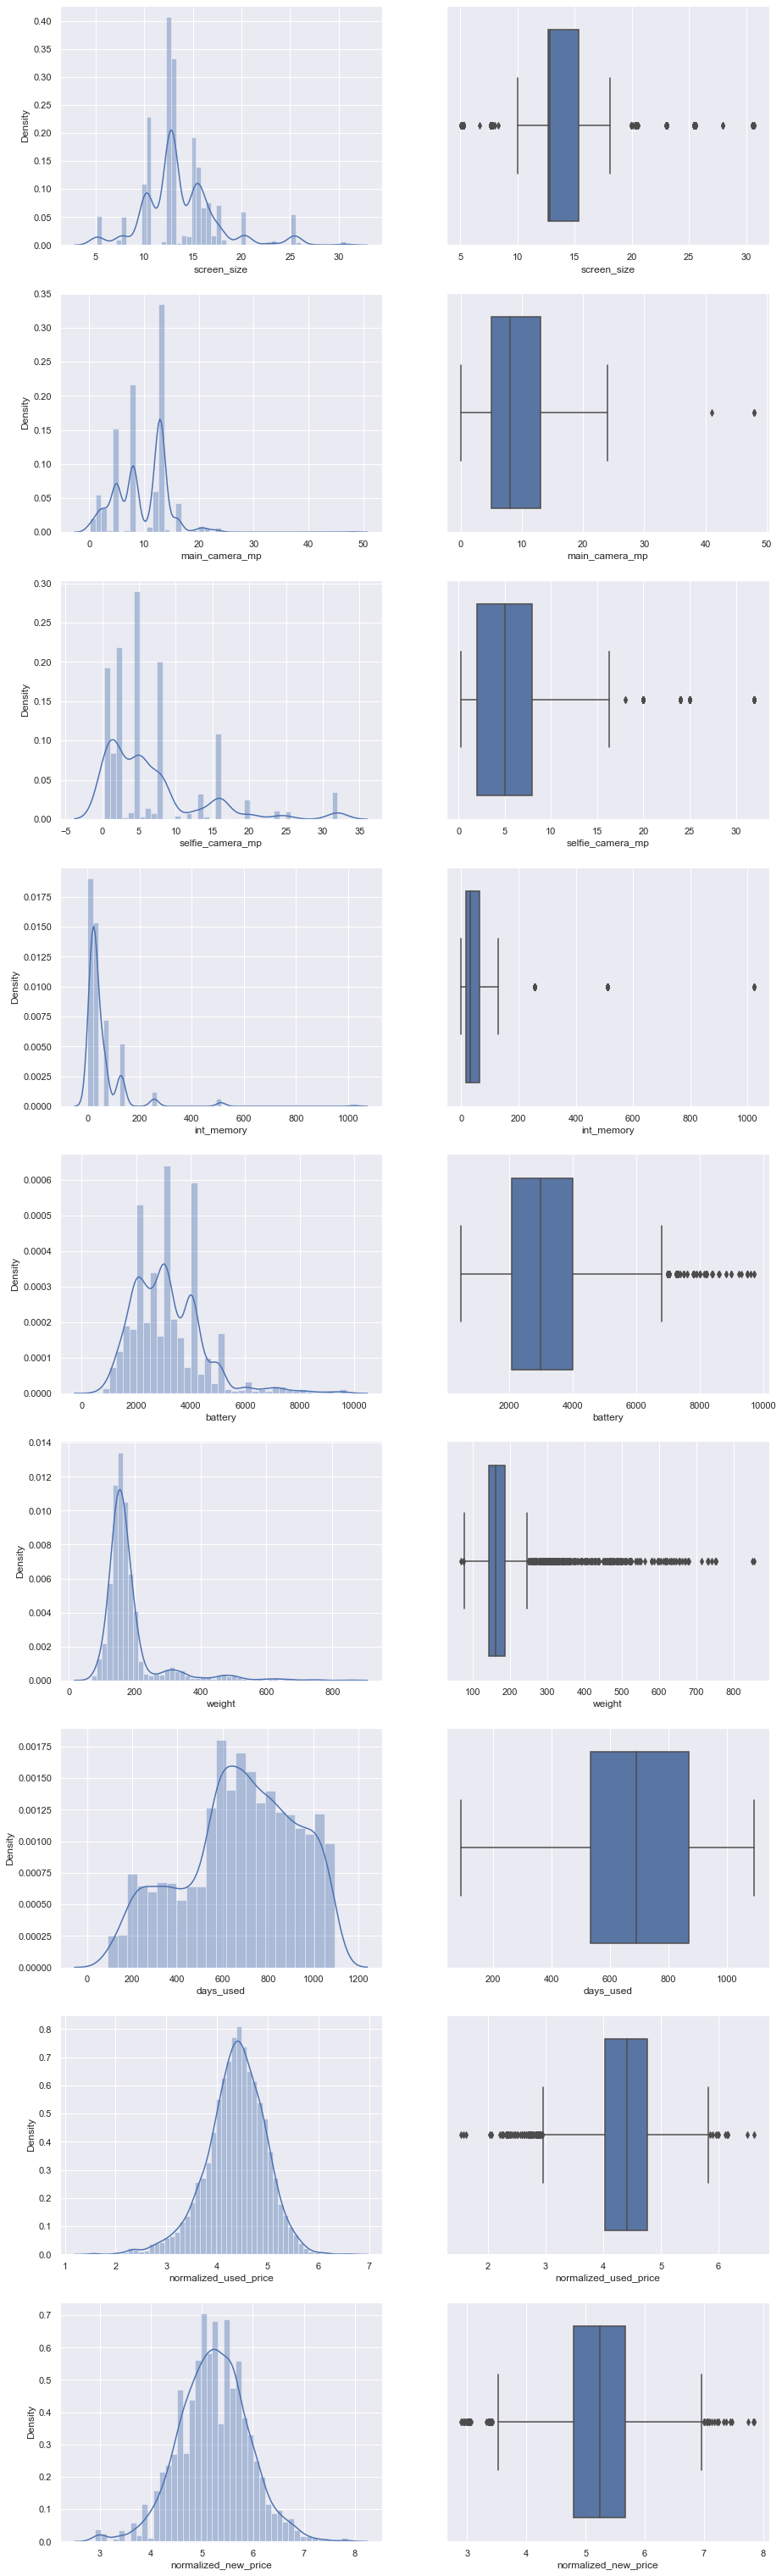

<IPython.core.display.Javascript object>

In [69]:
a = 1
plt.figure(figsize=(15, 80))
for i in df[
    [
        "screen_size",
        "main_camera_mp",
        "selfie_camera_mp",
        "int_memory",
        "battery",
        "weight",
        "days_used",
        "normalized_used_price",
        "normalized_new_price",
    ]
]:
    if df[i].dtype != "object":
        plt.subplot(13, 2, a)
        sns.distplot(df[i])
        plt.subplot(13, 2, a + 1)
        sns.boxplot(df[i])
        a += 2

- There are no outliers in the days_used column

- There are a few upper outliers in the main_camera_mp, selfie_camera_mp, int_memory and battery. 
- There are more than a few lower and upper outliers in the screen_size and weight columns

- Performing  flooring and capping to remove these outliers and build our model

- There are some upper and lower outliers in the normalized_new_price independent and normalized_used_price dependent columns

In [70]:
def remove_outlier(col):
    sorted(col)
    q1, q3 = np.quantile(col, [0.25, 0.75])
    iqr = q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr
    return ll, ul

<IPython.core.display.Javascript object>

In [71]:
a = 1
plt.figure(figsize=(15, 80))
for i in df[
    [
        "screen_size",
        "main_camera_mp",
        "selfie_camera_mp",
        "int_memory",
        "battery",
        "weight",
        "days_used",
        "normalized_used_price",
        "normalized_new_price",
    ]
]:
    if df[i].dtype != "object":
        ll, ul = remove_outlier(df[i])
        df[i] = np.where(df[i] > ul, ul, df[i])
        df[i] = np.where(df[i] < ll, ll, df[i])

<Figure size 1080x5760 with 0 Axes>

<IPython.core.display.Javascript object>

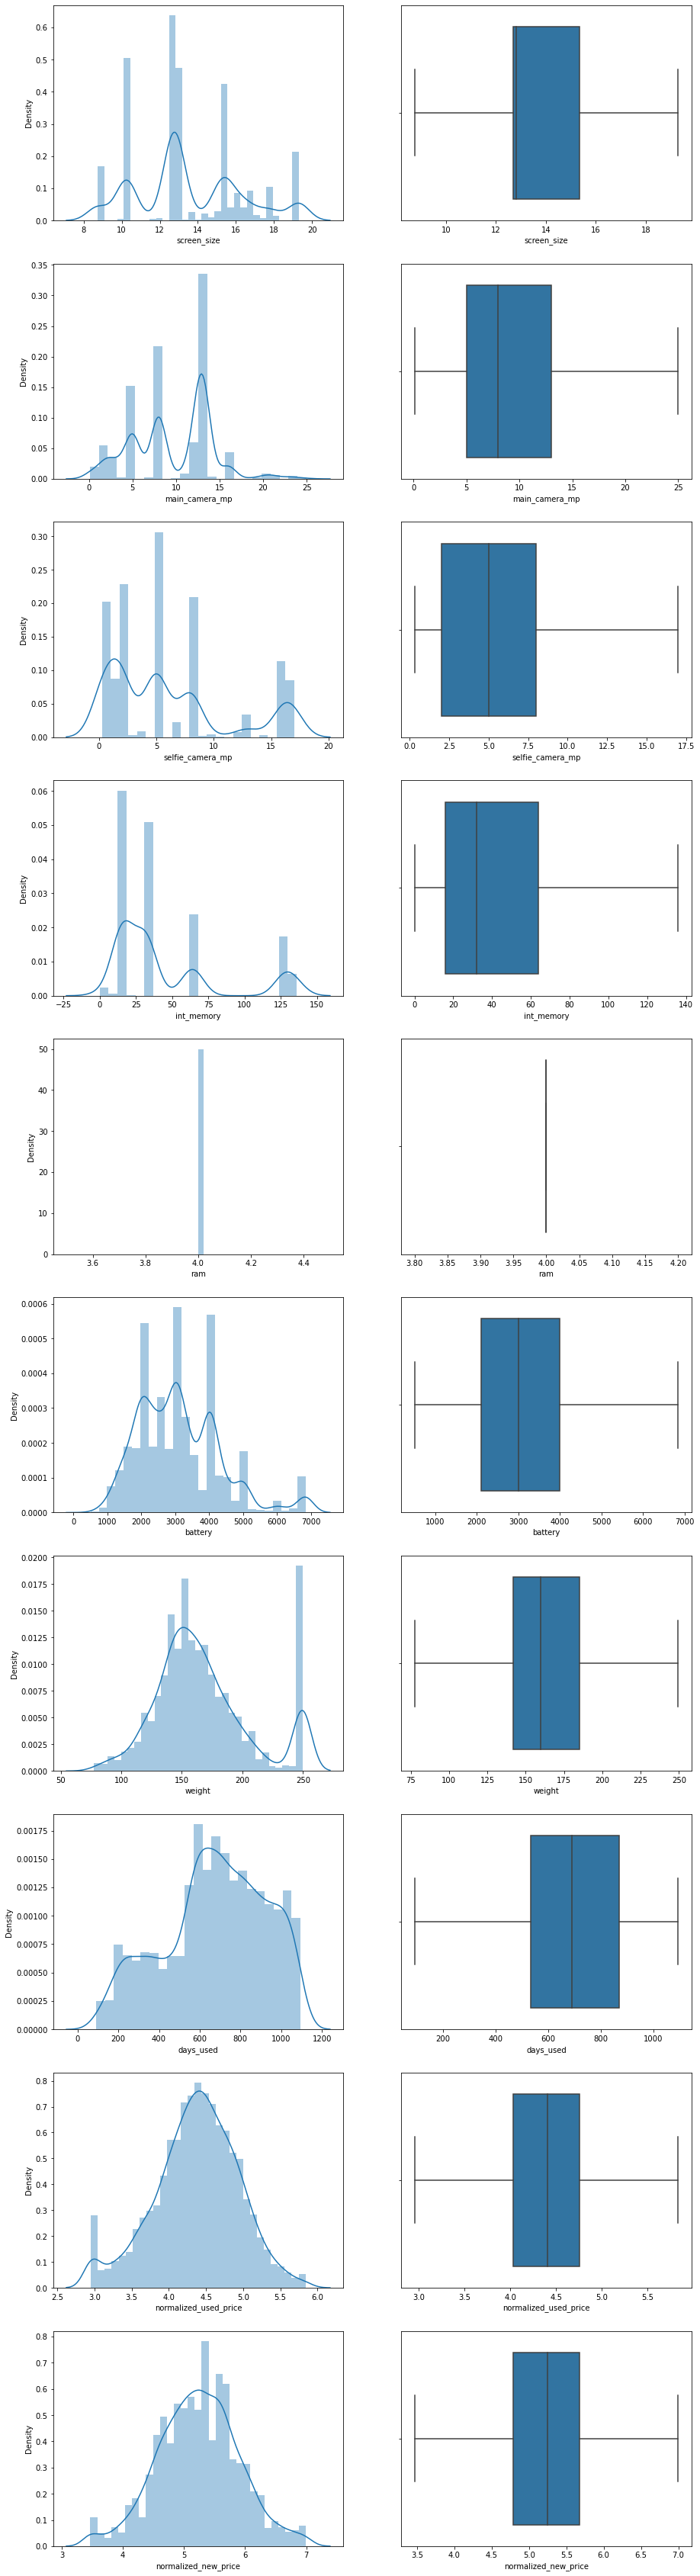

In [38]:
a = 1
plt.figure(figsize=(15,80))
for i in df[
    [ 
        "screen_size",
        "main_camera_mp",
        "selfie_camera_mp",
        "int_memory",
        "ram",
        "battery",
        "weight",
        "days_used",
        "normalized_used_price",
        "normalized_new_price",
    ]
]:
    if df[i].dtype != 'object':
        plt.subplot(13,2,a)
        sns.distplot(df[i])
        plt.subplot(13, 2, a+1)
        sns.boxplot(df[i])
        a += 2

- All outliers have been treated

### EDA
- Exploring the data once again after manipulating..

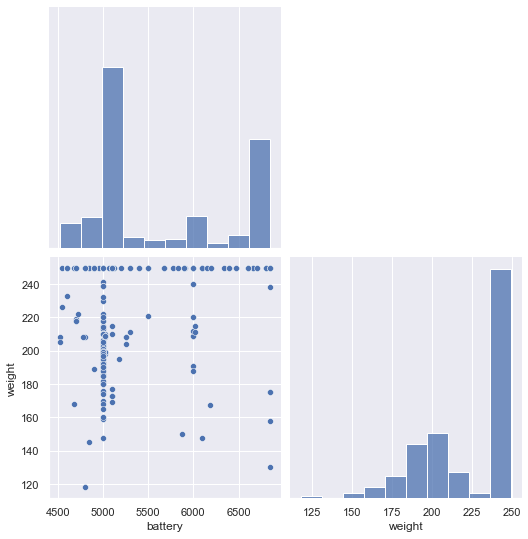

Linear correlation factor between phone's weight and battery 0.48


<IPython.core.display.Javascript object>

In [72]:
df_largebatteries = df[df["battery"] > 4500]

g = sns.pairplot(data=df_largebatteries[["battery", "weight"]], corner=True)
g.fig.set_size_inches(8, 8)
plt.show()
print(
    "Linear correlation factor between phone's weight and battery",
    round(df_largebatteries.corr()["weight"]["battery"], 2),
)

- The linear correlation between a phone's weight and battery has dropped from 0.76 to 0.48 
after outlier treatment, i.e., has become weaker

<AxesSubplot:>

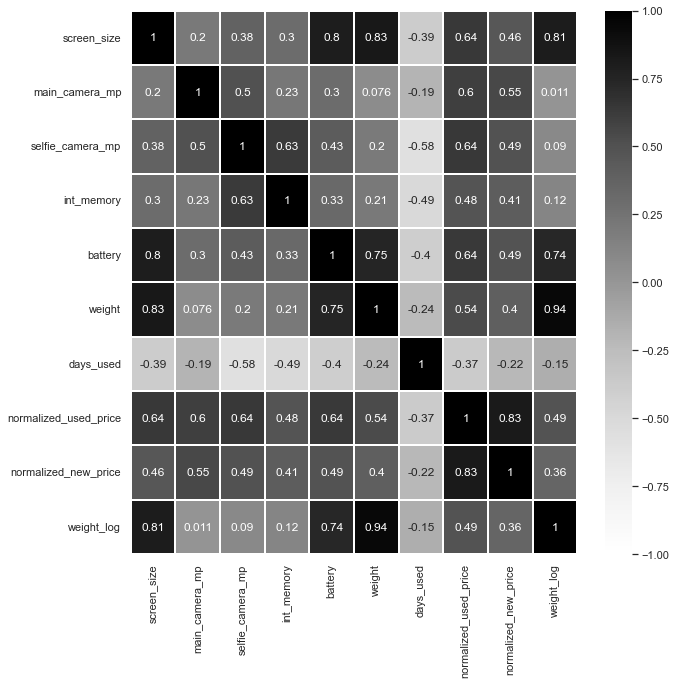

<IPython.core.display.Javascript object>

In [73]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
numeric_columns.remove("release_year")  # as it is a temporal variable

plt.figure(figsize=(10, 10))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    cmap="Greys",
    linewidths=0.05,
)

- normalized_used_price has become marginally more negatively correlated with 
  number of days_used (-0.37 vs. -0.36 before outlier treatment)
- normalized_used_price is still strongly-positively correlated with normalized_new_price  
  0.83 before & after outlier treatment
- The linear correlation with selfie_camera (0.66 vs. 0.61 before), main_camera (0.6 vs. 0.59 before), screen_size (0.64 vs. 0.61 before), battery ( 0.64 vs. 0.61 before) have all increased in comparison to values before outlier treatment

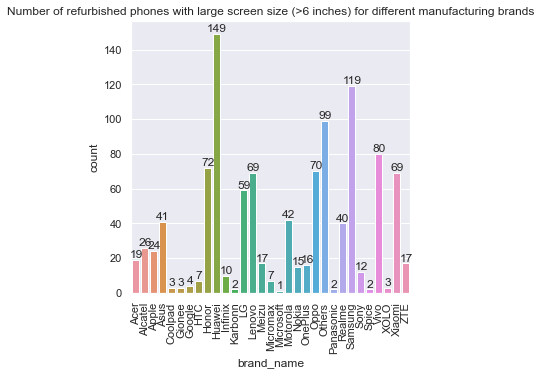

<IPython.core.display.Javascript object>

In [74]:
# 6 inches = 6*2.54cm = 15.24cm
df_largescreen = df[df["screen_size"] > 15.24]

plt.figure(figsize=(5, 5))

ax = sns.countplot(
    data=df_largescreen.sort_values("brand_name", ascending=True), x="brand_name"
)
plt.xticks(rotation=90)
plt.title(
    "Number of refurbished phones with large screen size (>6 inches) for different manufacturing brands"
)
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=12,
        xytext=(0, 5),
        textcoords="offset points",
    )
plt.show()

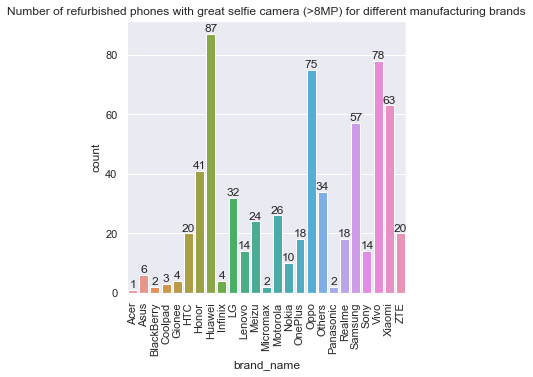

<IPython.core.display.Javascript object>

In [74]:
df_greatselfiecamera = df[df["selfie_camera_mp"] > 8]

plt.figure(figsize=(5, 5))

ax = sns.countplot(
    data=df_greatselfiecamera.sort_values("brand_name", ascending=True), x="brand_name"
)
plt.xticks(rotation=90)
plt.title(
    "Number of refurbished phones with great selfie camera (>8MP) for different manufacturing brands"
)
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=12,
        xytext=(0, 5),
        textcoords="offset points",
    )
plt.show()

## Building a Linear Regression model

In [78]:
# defining X and y variables
X = df.drop(
    ["normalized_used_price", "release_year"], axis=1
)  # since year is a temporal variable
y = df["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        19.30  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  battery  weight  days_used  \
0               5.0        64.0   3020.0   146.0      127.0   
1              16.0       128.0   4300.0   213.0      325.0   
2               8.0       128.0   4200.0   213.0      162.0   
3               8.0        64.0   6850.0   249.5      345.0   
4               8.0        64.0   5000.0   185.0      293.0   

   normalized_new_price  weight_log  
0              4.715100    4.983607  
1              5.519018    5.361292  
2              5.884631    5.361292  
3              5.630961    6.173786  
4              4.947837    5.220356  
0    4.3

<IPython.core.display.Javascript object>

In [79]:
# encoding categorical variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.to_list(),
    drop_first=True,
)

print(X.shape)
X.head()

(3454, 45)


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_new_price,weight_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_not_Android,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3020.0,146.0,127.0,4.715100,4.983607,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,4300.0,213.0,325.0,5.519018,5.361292,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,4200.0,213.0,162.0,5.884631,5.361292,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,19.30,13.0,8.0,64.0,6850.0,249.5,345.0,5.630961,6.173786,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,5000.0,185.0,293.0,4.947837,5.220356,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [80]:
# Split the data into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [81]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

In [82]:
# fitting the model on the train data (70% of the whole data)

linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

### Checking the coefficients and intercept of the model

In [83]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=X_train.columns.to_list() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
screen_size,0.035713
main_camera_mp,0.024875
selfie_camera_mp,0.019743
int_memory,0.000806
battery,-0.000013
weight,-0.001946
days_used,-0.000023
normalized_new_price,0.371834
weight_log,0.483291
brand_name_Alcatel,-0.051148


<IPython.core.display.Javascript object>

## Model performance evaluation

- metric functions defined in sklearn for RMSE, MAE, and $R^2$
- user defined function to calculate MAPE and adjusted $R^2$

In [84]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [85]:
# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, X_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.217738,0.172354,0.851368,0.848547,4.054798


<IPython.core.display.Javascript object>

In [86]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, X_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.22233,0.178798,0.841434,0.834234,4.172599


<IPython.core.display.Javascript object>

### Observations
- The training $R^2$ is 0.84, indicating that the model explains approx. 84% of the variation in the train data. So, the model   is not underfitting
- MAE (0.172, 0.178) and RMSE (0.2177, 0.2223) on the train and test sets are comparable, which shows that the model is not       overfitting
- MAE indicates that our current model is able to predict normalized_used_price within a mean error of 0.1787 on the test data
- MAPE on the test set suggests we can predict within 4.17% of normalized_used_price

## Linear Regression using statsmodels

In [87]:
# to build linear regression_model using statsmodels
import statsmodels.api as sm

# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
X_train1 = sm.add_constant(X_train)
# adding constant to the test data
X_test1 = sm.add_constant(X_test)

olsmod0 = sm.OLS(y_train, X_train1).fit()
print(olsmod0.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.851
Model:                               OLS   Adj. R-squared:                  0.849
Method:                    Least Squares   F-statistic:                     301.8
Date:                   Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                           21:30:18   Log-Likelihood:                 255.06
No. Observations:                   2417   AIC:                            -418.1
Df Residuals:                       2371   BIC:                            -151.8
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

### Observations

- Negative values of the coefficient show that normalized_used_price decreases with the increase of corresponding attribute value
- Positive values of the coefficient show that normalized_used_price increases with the increase of corresponding attribute value

- p-value of a variable indicates if the variable is significant or not. 
 If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 
 would be considered significant But these variables might contain multicollinearity, 
 which will affect the p-values. So, we need to deal with multicollinearity and 
 check the other assumptions of linear regression first, and then look at the p-values

### Checking Linear Regression Assumptions

### Variance Inflation Factor (VIF):
Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors.

- If VIF is between 1 and 5, then there is low multicollinearity
- If VIF is between 5 and 10, we say there is moderate multicollinearity
- If VIF is exceeding 10, it shows signs of high multicollinearity

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [89]:
checking_vif(X_train1)

,feature,VIF
0,const,1626.302332
1,screen_size,5.702939
2,main_camera_mp,2.536798
3,selfie_camera_mp,3.279490
4,int_memory,2.302516
5,battery,4.054155
6,weight,11.248595
7,days_used,1.930153
8,normalized_new_price,2.901906
9,weight_log,12.463944


<IPython.core.display.Javascript object>

- The brand_name_LG of a phone has VIF moderately above  5
- The screen_size,weight,weight_log,brand_name_Huawei,brand_name_Others,brand_name_Samsung has VIF above 5
### Removing Multicollinearity
To remove multicollinearity

- Drop every column one by one that has a VIF score greater than 5
- Look at the adjusted R-squared and RMSE of all these models
- Drop the variable that makes the least change in adjusted R-squared
- Check the VIF scores again
- Continue till you get all VIF scores under 5

In [90]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [91]:
col_list = [
    "screen_size",
    "weight",
    "weight_log",
    "brand_name_Huawei",
    "brand_name_LG",
    "brand_name_Others",
    "brand_name_Samsung",
]

res = treating_multicollinearity(X_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Samsung,0.848594,0.219805
1,brand_name_Huawei,0.848556,0.219833
2,brand_name_LG,0.848556,0.219833
3,brand_name_Others,0.848530,0.219852
4,screen_size,0.843052,0.223792
5,weight_log,0.841568,0.224847
6,weight,0.840204,0.225813


<IPython.core.display.Javascript object>

In [92]:
col_to_drop = "brand_name_Others"
X_train2 = X_train1.loc[:, ~X_train1.columns.str.startswith(col_to_drop)]
X_test2 = X_test1.loc[:, ~X_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif


VIF after dropping  brand_name_Others


,feature,VIF
0,const,1530.484151
1,screen_size,5.693260
2,main_camera_mp,2.534969
3,selfie_camera_mp,3.279477
4,int_memory,2.300893
5,battery,4.049897
6,weight,11.247556
7,days_used,1.929964
8,normalized_new_price,2.900035
9,weight_log,12.460661


<IPython.core.display.Javascript object>

In [93]:
col_list = [
    "screen_size",
    "weight",
    "weight_log",
]

res = treating_multicollinearity(X_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.843052,0.223792
1,weight_log,0.841568,0.224847
2,weight,0.840204,0.225813


<IPython.core.display.Javascript object>

In [94]:
col_to_drop = "weight_log"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight_log


,feature,VIF
0,const,145.809090
1,screen_size,5.393888
2,main_camera_mp,2.495647
3,selfie_camera_mp,3.182985
4,int_memory,2.284397
5,battery,3.689369
6,weight,4.651355
7,days_used,1.899512
8,normalized_new_price,2.882035
9,brand_name_Alcatel,1.192391


<IPython.core.display.Javascript object>

### The above predictors have no multicollinearity and the assumption is satisfied

#### Let's check the model performance

In [95]:
olsmod1 = sm.OLS(y_train, X_train3).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     299.4
Date:                   Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                           21:35:40   Log-Likelihood:                 199.29
No. Observations:                   2417   AIC:                            -310.6
Df Residuals:                       2373   BIC:                            -55.81
Df Model:                             43                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

### Observations
- We can see that adj.R-squared has remained approx. same 0.84 for the train set (70% dataset), 
  which shows that the dropped columns (brand_name_others, weight_log) did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance
  5g_yes, battery, weight, brand_name have p-value > 0.05. So, they are not significant and we'll drop them.
  But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
  Instead, we will do the following:
- Build a model, check the p-values of the variables, and drop the column with the highest p-value
- Create a new model without the dropped feature, check the p-values of the variables, and drop the 
  column with the highest p-value
- Repeat the above two steps till there are no columns with p-value > 0.05

In [96]:
# initial list of columns
cols = X_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'weight', 'normalized_new_price', 'brand_name_Apple', 'brand_name_Asus', 'brand_name_Celkon', 'brand_name_Microsoft', 'brand_name_Xiaomi', '4g_yes']


<IPython.core.display.Javascript object>

In [97]:
X_train4 = X_train3[selected_features]
X_test4 = X_test3[selected_features]

<IPython.core.display.Javascript object>

In [98]:
olsmod2 = sm.OLS(y_train, X_train4).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     1077.
Date:                   Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                           21:37:51   Log-Likelihood:                 190.22
No. Observations:                   2417   AIC:                            -354.4
Df Residuals:                       2404   BIC:                            -279.2
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

### Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as 
### the final ones and olsmod2 as final model
- Selected features screen_size, selfie_camera, int_memory, normalized_new_price, 4g_yes have 
  positive influence and days_used, 4g_yes have negative influence on normalized_used_price
    
### Observations

- Now adjusted R-squared is 0.842, i.e., our model is able to explain ~84.2% of the variance. 
  This shows that the model is good
- The adjusted R-squared in olsmod0 (where we considered all the variables) was 0.849. 
- This shows that the variables we dropped were not affecting the model much

## TEST FOR LINEARITY AND INDEPENDENCE

- Linearity describes a straight-line relationship between two variables, 
  predictor variables must have a linear relation with the dependent variable
- If the residuals are not independent, then the confidence intervals of the coefficient estimates 
  will be narrower and make us incorrectly conclude a parameter to be statistically significant
    
### Check for linearity and independence-

- Make a plot of fitted values vs residuals
- If they don't follow any pattern, then we say the model is linear and residuals are independent
- Otherwise, the model is showing signs of non-linearity and residuals are not independent

In [99]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.253045,0.008931
3141,4.175156,3.824270,0.350886
1233,4.117410,4.464196,-0.346786
3046,3.782597,3.831127,-0.048530
2649,3.981922,3.934691,0.047231


<IPython.core.display.Javascript object>

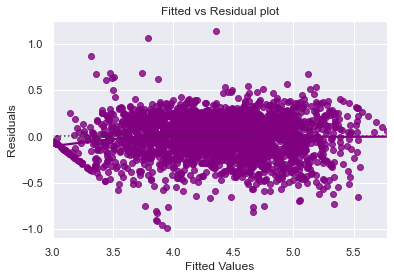

<IPython.core.display.Javascript object>

In [100]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) 
  #### We see a very reversed faint "U" pattern in the plot of residuals vs fitted values, 
  however, this can be considered negligible given the range of residuals is very close to 0 (between -0.5 and 0.5). 
  The pattern may indicate that the model has some non linear dependancies and may be improved by transforming 
  the columns or better defined by non-linear models

### Given the context of the problem, assumption is satified

### TEST FOR NORMALITY

- Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, 
  confidence intervals of the coefficient estimates may become too wide or narrow. 
  Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on 
  minimization of least squares. Non-normality suggests that there are a few unusual data points 
  that must be studied closely to make a better model

- The shape of the histogram of residuals can give an initial idea about the normality

- It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution,
  they will make a straight line plot, otherwise not
- Other tests to check for normality includes the Shapiro-Wilk test
  -  Null hypothesis: Residuals are normally distributed
  -  Alternate hypothesis: Residuals are not normally distributed

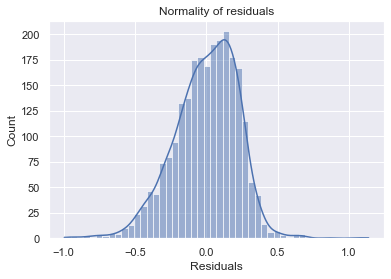

<IPython.core.display.Javascript object>

In [101]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

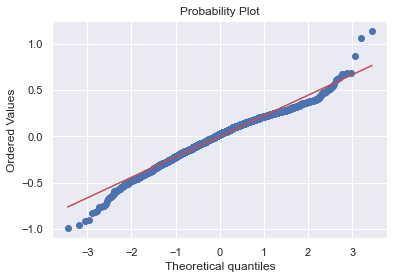

<IPython.core.display.Javascript object>

In [102]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The residuals more or less follow a straight line except for the tails
Let's check the results of the Shapiro-Wilk test

In [104]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9809803366661072, pvalue=1.8597700235376734e-17)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test
- Strictly speaking, the residuals are not normal
- However, as an approximation, we can accept this distribution as close to being normal #### So, the assumption is satisfied

## Final Model Summary

### Conclusions
- As expected, we can see that selfie_camera, screen_size, and int_memory are significant parameters. 
  As these increases, the normalized_used_price is expected to increase. This is indicated by 
  positive coefficients for these parameters predicted by the model
- EDA post data processing also indicated brand_name_Huawei have the maximum number of refurbished phones with large 
  screen_size and better selfie_camera and  thereby reaffirming the validity of the model
- 1 unit increase in normalized_new_price  is expected to increase normalized_used_price by almost 0.4140 units
- linear correlation between normalized_used_price and normalized_new_price; 
  therby reafirming model validity
- 4g and 5g are both significant parameters, with 4g marginally contributing positively 
  
- Preliminary EDA revealed moderately positive correlation between weight of the phone and battery 
  as the battery size increases (0.7), however, weight and battery have been found to be not 
  significant factors in predicting normalized_used_price. RAM for the 
  refurbished phones was found to be constant ~4GB on average across the dataset, and also insignificant. 
  Similar to RAM, almost 90% of phones were found to be operating on Android os, also insignificant factor for prediction
- The linear predictive model is able to predict the normalized_used_price of the phone, explaining ~84% of the variance in 
  the data, within a mean absolute percentage error of NaN. The model is hence good
- All of the assumptions for linear regression were met for the model - multicollinearity or predictor VIFs<5, 
  normality of error terms and homoscedasticity. While the independence and linearity assumption can be assumed 
  met after suitable transformation/data preprocessing, the data gave the impression that non-linear models 
  may be more suited for prediction